<a href="https://colab.research.google.com/github/This-is-joejoe/Linear-Regression-Basis-Expansion-and-feature-Selection/blob/main/Linear_Regression%2C_Basis_Expansion_and_feature_Selection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd



In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

X, t = load_boston(return_X_y=True)
print(X.shape)
print(t.shape)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
from sklearn.model_selection import train_test_split

#split data to training and testing
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 1/4 ,random_state = 4626 )

#apply greefy algorithm
t_test = np.expand_dims(t_test, axis=1)

#concatenate X_train and t_train so can be used for later use
#(add targets to first column)
Full_data = np.concatenate((t_train[:,None],X_train),axis = 1)
print(t_train[0:1])
print(X_train[0:1,:])

print(Full_data[0:1,:])
print(Full_data.shape)



[19.3]
[[6.6170e-02 0.0000e+00 3.2400e+00 0.0000e+00 4.6000e-01 5.8680e+00
  2.5800e+01 5.2146e+00 4.0000e+00 4.3000e+02 1.6900e+01 3.8244e+02
  9.9700e+00]]
[[1.9300e+01 6.6170e-02 0.0000e+00 3.2400e+00 0.0000e+00 4.6000e-01
  5.8680e+00 2.5800e+01 5.2146e+00 4.0000e+00 4.3000e+02 1.6900e+01
  3.8244e+02 9.9700e+00]]
(379, 14)


In [ ]:
from sklearn.model_selection import KFold
#define a linear regression function with L2 regularization term
def linear_reg(X_train,t_train):
  #add a small regularization term is for avoid singular matrix

  n,d = X_train.shape#record the dim
  la = np.identity(d)*2*1e-6
  la[0][0] = 0
  A = np.dot(X_train.T,X_train)
  C = np.dot(X_train.T,t_train)
  B = n/2*la
  W = np.dot(np.linalg.inv(np.add(A,B)),C)
  return W

#define a funtion calculate average square errors
def err(W,X,t):
  Y = np.dot(X,W)
  diff = np.subtract(t,Y)
  err = np.dot(diff.T,diff)/len(t)
  return err

  

#define a K fold cross validation function which return the average error 
def K_fold_cross(X,t,k):
  error = np.zeros(k)
  kf = KFold(n_splits = k, shuffle=True, random_state = 4626)
  i = 0
  for train_index, test_index in kf.split(X):
    X_T = np.take(X,train_index,0)
    t_T = np.take(t,train_index,0)
    X_V = np.take(X,test_index,0)
    t_V = np.take(t,test_index,0)

    #train model
    W = linear_reg(X_T,t_T)

    #calculate the error for the validation set and add it to error
    error[i] = err(W,X_V,t_V)
    i +=1
  #return average errors in K fold
  return np.average(error)

(379, 1)
At this round model selected feature is LSTAT
The feature subset is  ['LSTAT'] 

12
The parameter vector for current subset is [[34.90232153]
 [-0.96536115]] 

(127, 2)
(127, 1)
At this round model selected feature is RM
The feature subset is  ['LSTAT', 'RM'] 

5
The parameter vector for current subset is [[ 0.88646629]
 [-0.68292112]
 [ 4.83801417]] 

(127, 3)
(127, 1)
At this round model selected feature is PTRATIO
The feature subset is  ['LSTAT', 'RM', 'PTRATIO'] 

10
The parameter vector for current subset is [[19.38944595]
 [-0.62216968]
 [ 4.31294003]
 [-0.86697045]] 

(127, 4)
(127, 1)
At this round model selected feature is DIS
The feature subset is  ['LSTAT', 'RM', 'PTRATIO', 'DIS'] 

7
The parameter vector for current subset is [[27.52192014]
 [-0.72962252]
 [ 3.94931928]
 [-0.96885275]
 [-0.67996591]] 

(127, 5)
(127, 1)
At this round model selected feature is NOX
The feature subset is  ['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX'] 

4
The parameter vector for current su

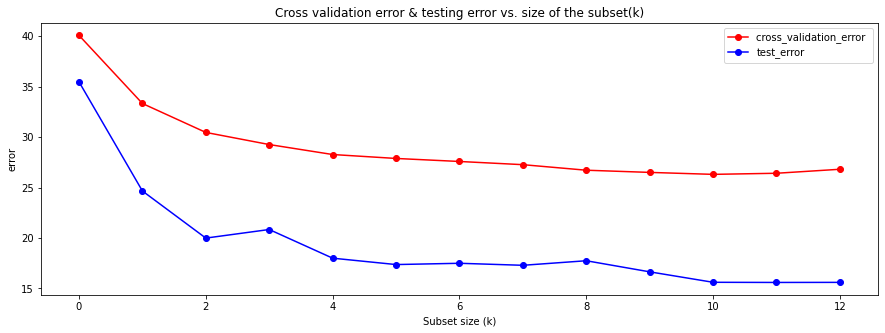

In [ ]:

#apply greefy algorithm

#construct using two for loop
K = 10


Data_at_stage = Full_data
Labels = Full_data[:,0:1]
print(Labels.shape)
S = np.ones((len(X_train),1))
S_2 = np.ones((len(X_test),1))
n = 0
cross_validation_error = np.zeros(13)
test_error = np.zeros(13)
Feature_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' ]
Feature_name_dic = {'CRIM':0, 'ZN':1, 'INDUS':2, 'CHAS':3, 'NOX':4, 'RM':5, 'AGE':6, 'DIS':7, 'RAD':8, 'TAX':9, 'PTRATIO':10, 'B':11, 'LSTAT':12 }
S_name = []

for i in range(13,0,-1):


  
  #delete feature been selected last run (n is 0 initially, so it will delete the label column)

  Data_at_stage = np.delete(Data_at_stage,n,1)
  #construct a feature matrix for current stage
  Features = Data_at_stage
  score = np.zeros(i)
  for j in range(i):# try i time 
    # construct a feature and targets matrix for current stage
    # we will temporarily add one feature per try to S(the subset)
    #print(S.shape)
    #print(Features.shape)
    Features_at_stage = np.concatenate((S,Features[:,j:j+1]),axis = 1) 
    
    #use the error as a score to show if it's good or not  
    score[j] = K_fold_cross(Features_at_stage,Labels,K)

    
  
  
  #select the best one and add it to S(record it's feature index n, will delete it next run)
  #print(score)
  n = np.argmin(score)
  #print(n)
  S = np.concatenate((S,Features[:,n:n+1]),axis = 1)
  #print(S.shape)
  #delete the n-th feature from Feature_name and print the selection of this round
  print('At this round model selected feature is %s' %(Feature_name[n]))
  S_name.append(Feature_name[n])
  print('The feature subset is ', S_name, '\n')
  Feature_name = np.delete(Feature_name,n)

  #print(Feature_name,'\n')

  #get the index of the selected feature over the feature dic
  f_index = Feature_name_dic[S_name[13-i]]
  print(f_index)

  #train model with selected feature

  W = linear_reg(S,Labels)
  print('The parameter vector for current subset is', W,'\n')

  #calculate cross-validation error and test error

  S_2 = np.concatenate((S_2,X_test[:,f_index:f_index+1]),axis = 1)
  print(S_2.shape)
  print(t_test.shape)
  cross_validation_error[13-i] = K_fold_cross(S,Labels,K)
  test_error[13-i] = err(W,S_2,t_test)
  




fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
plt.title('Cross validation error & testing error vs. size of the subset(k)')
ax.plot(range(13),cross_validation_error,'o-',color = 'r',label = 'cross_validation_error ')
ax.plot(range(13),test_error,'o-',color = 'b',label = 'test_error')
plt.xlabel('Subset size (k)')
plt.ylabel('error')
plt.legend()
plt.show()
#####print(X_train[0:3,:])
#####print(S[0:3,:])




(379, 1)
LSTAT
(379, 4)
(127, 4)
30.988305053399976
24.720057866359465
RM
(379, 7)
(127, 7)
26.739780188190462
15.621964051392501
PTRATIO
(379, 10)
(127, 10)
24.59695633558736
13.366123850834775
DIS
(379, 13)
(127, 13)
24.30970700524919
13.467922397401159
NOX
(379, 16)
(127, 16)
22.536879455156612
12.692611495843114
CHAS
(379, 19)
(127, 19)
22.39216338037253
11.930082244713747
CRIM
(379, 22)
(127, 22)
24.5834157803326
12.097197581597033
RAD
(379, 25)
(127, 25)
21.093394835497456
11.873430558775345
TAX
(379, 28)
(127, 28)
20.30755847606981
11.49824498319496
B
(379, 31)
(127, 31)
20.27022352987355
11.548161904429126
ZN
(379, 34)
(127, 34)
20.283637912046277
11.378918715547757
INDUS
(379, 37)
(127, 37)
20.312382422682255
11.571526800138535
AGE
(379, 40)
(127, 40)
20.556869606401925
11.755584207326718
(13,)


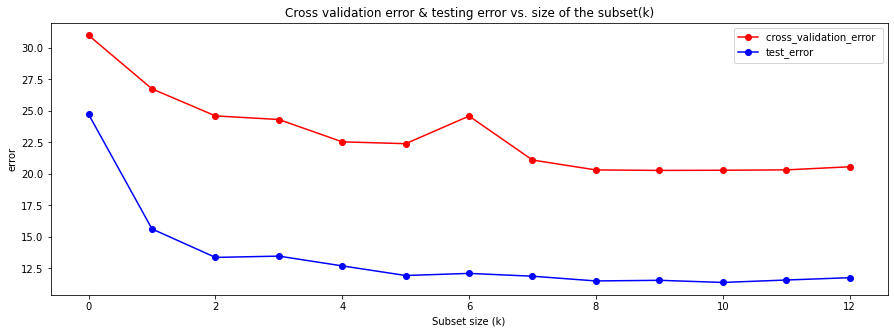

In [ ]:
# Basis expansion 
#solution #1   square expansion
#   a + x1^2 + x2^2 + x3^3 ........+ x13^2

Data_at_stage = np.delete(Full_data,0,1)
Labels = Full_data[:,0:1]
print(Labels.shape)
S = np.ones((len(X_train),1))
S_2 = np.ones((len(X_test),1))
n = 0
cross_validation_error = np.zeros(13)
test_error = np.zeros(13)

for i in range(0,13):

  # give the index of the feature we going to use
  f_index = Feature_name_dic[S_name[i]]
  print(S_name[i])
  for j in range(1,4):
    S = np.concatenate((S,Data_at_stage[:,f_index:f_index+1]**j),axis = 1)
    S_2 = np.concatenate((S_2,X_test[:,f_index:f_index+1]**j),axis = 1)
  print(S.shape)
  print(S_2.shape)
  W = linear_reg(S,Labels)

  cross_validation_error[i] = K_fold_cross(S,Labels,K)
  print(cross_validation_error[i])
  test_error[i] = err(W,S_2,t_test)
  print(test_error[i])

print(test_error.shape)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
plt.title('Cross validation error & testing error vs. size of the subset(k)')
ax.plot(range(13),cross_validation_error,'o-',color = 'r',label = 'cross_validation_error ')
ax.plot(range(13),test_error,'o-',color = 'b',label = 'test_error')
plt.xlabel('Subset size (k)')
plt.ylabel('error')
plt.legend()
plt.show()


  